# Análise exploratória com Python

Análise Exploratória de Dados consiste em compreender os dados por meio de técnicas de sumarização e visualização.

Embora seja realizada na parte inicial, esta fase é **FUNDAMENTAL** e demanda bastante trabalho. Vale destacar que esta etapa é muito importante para que os dados obtidos estejam adequadamente tratados e ajustados para aplicação de algoritmos de machine learning ou testes de hipóteses.

Apesar de não haver uma regra de como realizar uma análise exploratória e esta análise depender do dataset disponível, há alguns métodos que podem ser úteis e podem ser utilizados na maioria das vezes. Sendo assim, farei alguns análises de um dataset para ilustrar potenciais aplicações de uma análise Exploratória de dados.


#### - Qual dataset iremos utilizar?

Para realizar a análise exploratória utilizaremos o dataset "Car Features and MSRP" disponível no [Kaggle](https://www.kaggle.com/datasets/CooperUnion/cardataset?resource=download). Este dataset contém informações sobre carros tais como marca, modelo, ano, tipo de motor e preço.

#### - Bibliotecas necessárias

In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(color_codes=True)

#### - Lendo a base

In [2]:
df = pd.read_csv('data.csv')
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


#### - Verificando o tipo de cada variável

In [3]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

#### - Excluindo variáveis que não serão utilizadas

In [4]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


#### - Renomeandos as variáveis

In [5]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


#### - Verificando e excluindo linhas duplicadas

In [6]:
df.shape

(11914, 10)

In [7]:
duplicate_rows_df = df[df.duplicated()]
print('Número de linhas duplicadas:', duplicate_rows_df.shape)

Número de linhas duplicadas: (989, 10)


Vamos remover os dados duplicados!


In [8]:
df.count() # conta o número de linhas antes de retirar os duplicados

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG-H           11914
MPG-C           11914
Price           11914
dtype: int64

Como observado, há 11.914 linhas e iremos remover as 989 linhas de dados duplicados.


In [9]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [10]:
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

Como podemos ver, as variáveis HP e Cylinders tem
apenas 10856, o que pode ser um indicativo de dado faltante!

Vamor tratar os missings!



#### - Removendo os missing e null values

Missing data (dados faltantes) é uma ocorrência comum na pesquisa científica. Dados faltantes ocorrem quando os valores das variáveis de interesse não são medidos ou registrados para todos os sujeitos da amostra. 

Perda de informações, tanto nos preditores como no desfecho, pode levar a problemas sérios na análise dos dados.

Missing data podem afetar diretamento o resultado de uma análise e, portanto, a presença (ausência!) desses tipo de dado deve ser cuidadosamente investigada e tratada.



In [11]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


Como esperado, as variáveis HP e Cylinders tem 69 e 30 valores faltantes, respectivamente.

In [12]:
df = df.dropna()    # Dropping the missing values.
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

In [13]:
print(df.isnull().sum())   # After dropping the values

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


Agora o dataset não contém mais missings!!!


#### - Verificando Outliers

Os outliers são dados que se diferenciam drasticamente de todos os outros, ou seja, o outlier é um valor que foge da normalidade e que pode (e provavelmente irá) causar anomalias nos resultados obtidos por meio de algoritmos ou testes de hipótese.

Entender os outliers é fundamental em uma análise de dados por pelo menos dois aspectos:

  1 - os outliers podem viesar negativamente todo o resultado de uma análise;

  2 - o comportamento dos outliers pode ser justamente o que está sendo procurado.

Por conta disso, os a presença de outliers devem ser cuidadosamente examinadas.

c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Price'>

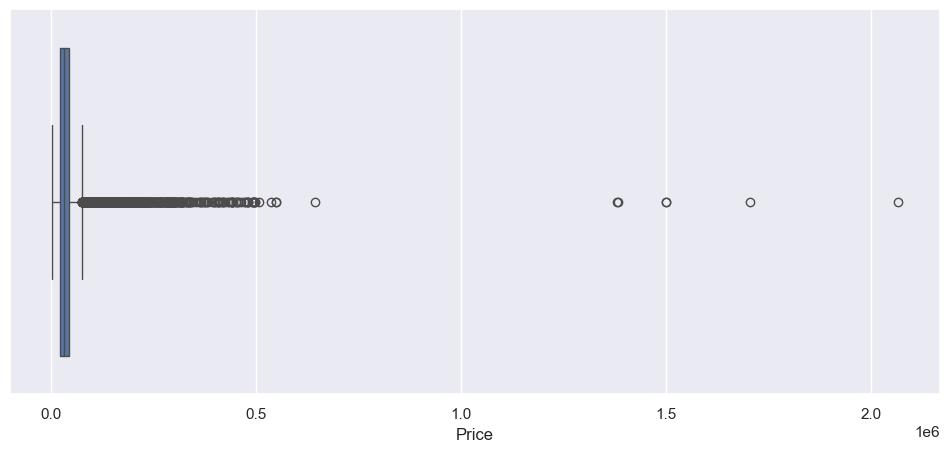

In [14]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.boxplot(x=df['Price'], ax=ax)

c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='HP'>

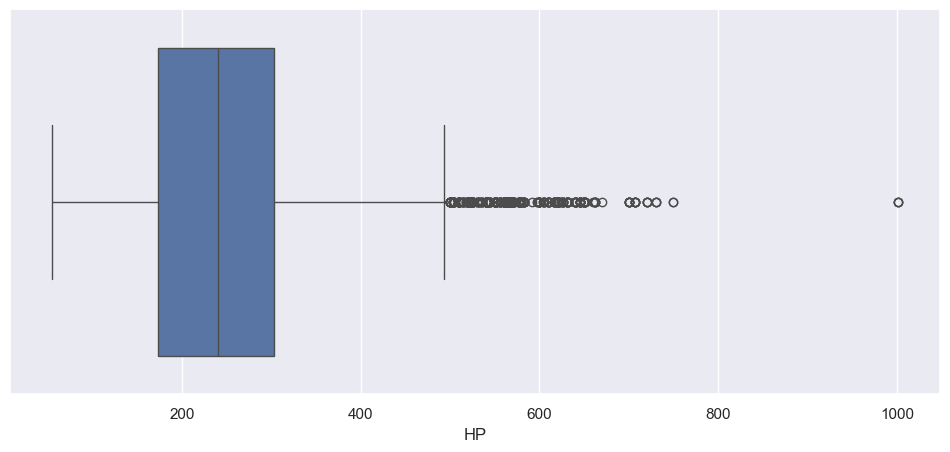

In [15]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.boxplot(x=df['HP'], ax=ax)

c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Cylinders'>

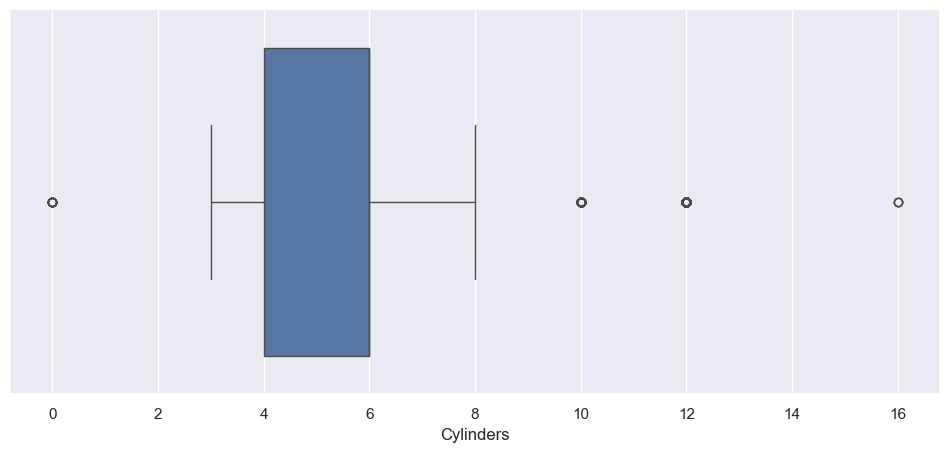

In [16]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.boxplot(x=df['Cylinders'], ax=ax)


#### - Verificando o intervalo interquartil (IQR)

In [17]:
Q1 = df.quantile(.25, numeric_only=True)
Q3 = df.quantile(.75, numeric_only=True)
IQR = Q3 - Q1
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


Don't worry about the above values because it's not important to know each and every one of them because it's just important to know how to use this technique in order to remove the outliers.

In [18]:
def remove_outliers(df):
  num_cols = df.select_dtypes(include=[np.number]).columns
  for col in num_cols:
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
      df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
  return df

df = remove_outliers(df)
df.shape

(9123, 10)

#### - Verificando as 20 maiores fabricantes de carros

Text(0.5, 0, 'Marca')

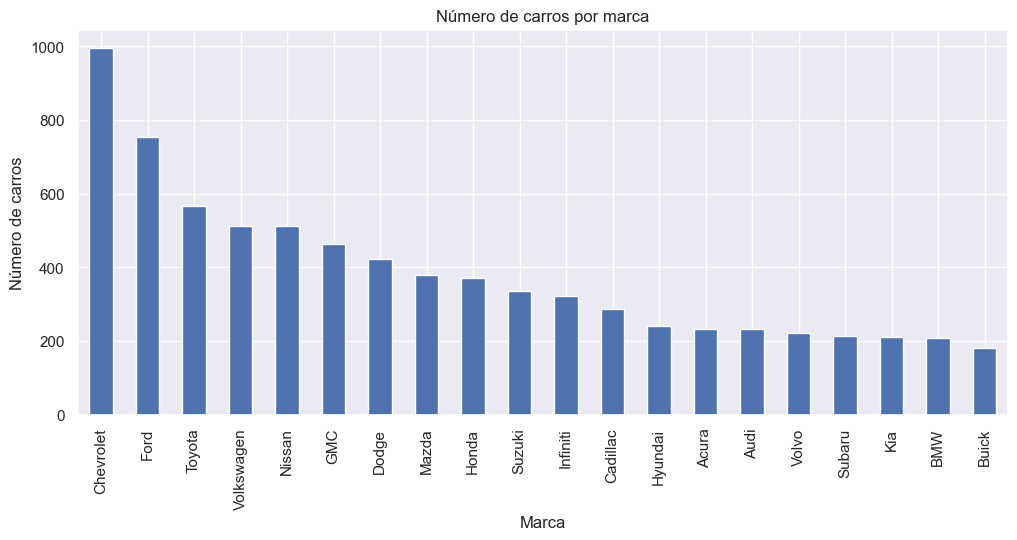

In [19]:
df.Make.value_counts().nlargest(20).plot(kind='bar', figsize=(12,5))
plt.title("Número de carros por marca")
plt.ylabel('Número de carros')
plt.xlabel('Marca')

#### - Verificando a correlação entre as variáveis

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.323020,-0.140447,0.381318,0.341922,0.599347
HP,0.323020,1.000000,0.712828,-0.445550,-0.545105,0.731587
Cylinders,-0.140447,0.712828,1.000000,-0.706541,-0.756941,0.343156
MPG-H,0.381318,-0.445550,-0.706541,1.000000,0.939414,-0.102067
MPG-C,0.341922,-0.545105,-0.756941,0.939414,1.000000,-0.175160
Price,0.599347,0.731587,0.343156,-0.102067,-0.175160,1.000000


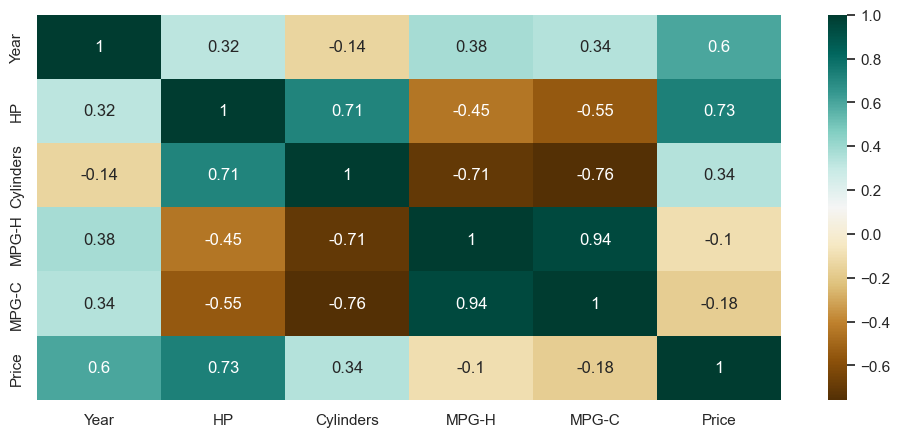

In [20]:
plt.figure(figsize=(12,5))
c = df.corr(numeric_only=True)
sns.heatmap(c,cmap='BrBG', annot=True)
c

#### - Verificando a dispersão dos dados de HP e Price

Como podemos observar, a variável HP (horsepower) e o preço do carro (Price) mostraram uma forte correlação. Por conta disso, iremos explorar mais essa relação por meio da visualização de um gráfico de dispersão dessas variáveis.


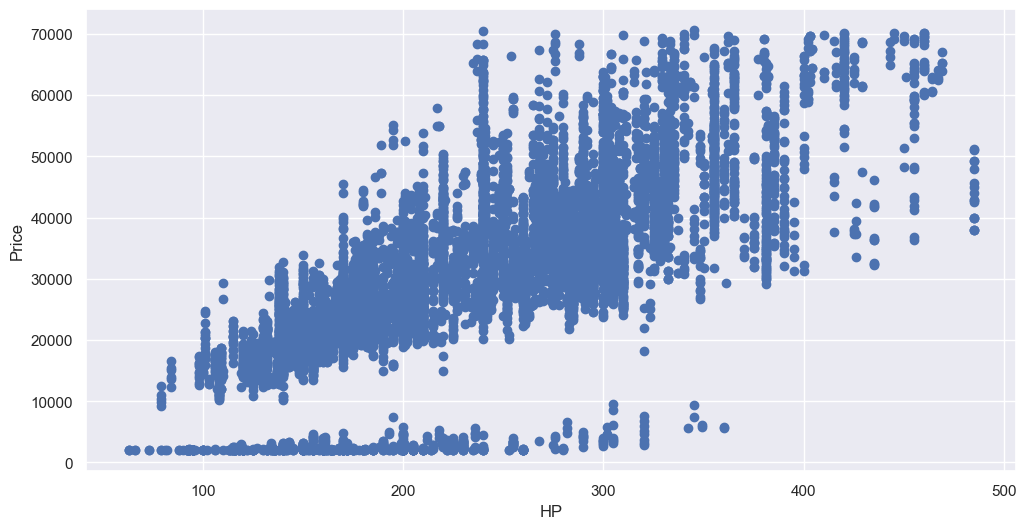

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(x=df['HP'], y=df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

Como podemos observar, a potência do carro parece apresentar uma relação direta com o preço do carro, ao menos naqueles carros com valor acima de 10 mil reais.

Vale destacar que há um importante número de carros com valores muito baixos, o que, ao meu ver necessita investigação visto que esses valores são incomuns para carros. Mas, esta é apenas uma sugestão visto que não tenho domínio nem entendimento profundo sobre preços e caracteristicas de carros.

#### - Fontes

[Car Features and MSRP - kaggle](https://www.kaggle.com/datasets/CooperUnion/cardataset?resource=download)

[Intro to Exploratory data analysis (EDA) in Python](https://www.kaggle.com/code/imoore/intro-to-exploratory-data-analysis-eda-in-python)

[Outliers, o que são e como tratá-los em uma análise de dados?](https://aquare.la/o-que-sao-outliers-e-como-trata-los-em-uma-analise-de-dados/)
